In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [8]:
# Este modelo de regresión lineal predice la producción de café en El Salvador para el año 2024
# usando datos históricos de producción de café arábica en El Salvador de 1990 a 2019.

df = pd.read_csv('../data_cafe/Coffee_production.csv')

country_data = df[(df['Country'] == 'El Salvador') & (df['Coffee type'] == 'Arabica')]

country_data = country_data.drop(['Country', 'Coffee type', 'Total_production'], axis=1)

time_series = country_data.squeeze()

# Crear una matriz con los números de los años
# Esto es necesario porque scikit-learn requiere que los datos de entrada sean bidimensionales
# entonces necesito convertir los datos de entrada en una matriz de 2D
# La función reshape(-1, 1) convierte los datos en una matriz de 2D con una columna
X = np.array(range(1990, 2020)).reshape(-1, 1)
y = time_series

# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal al conjunto de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Hacer una predicción para el  año 2024
X_future = np.array([2024]).reshape(-1, 1)
prediccion = model.predict(X_future)

# Convertir la predicción a una cadena con comas como separadores de miles
prediccion_str = format(prediccion[0], ",.2f")

print(f'Prediccion para 2024: {prediccion_str}')

MSE: 401372418731731.56
Prediccion para 2024: 9,260,602.38


Accuracy: 78.09573124836653%


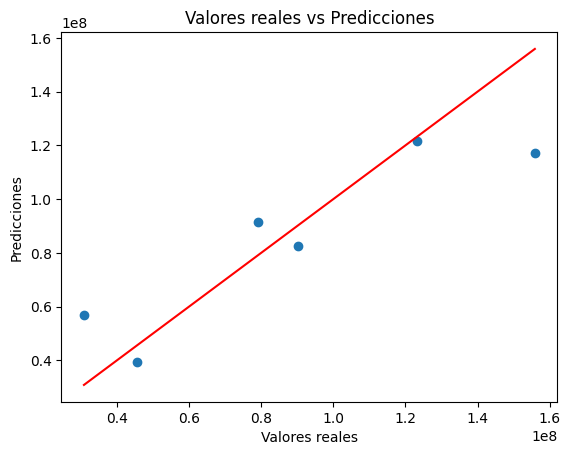

In [7]:
# voy a graficar las predicciones frente a los valores reales
# para ver qué tan bien se ajusta el modelo a los datos
# si el modelo es perfecto, todas las predicciones estarán en la línea roja
# pero si no es perfecto, las predicciones estarán dispersas alrededor de la línea roja
# aunque mi modelo me dio un 78% de accuracy,
# la gráfica me muestra que el modelo no es perfecto


import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar las predicciones frente a los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')

# Agregar una línea diagonal
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

# Evaluar el modelo
score = model.score(X_test, y_test)
print(f'Accuracy: {score*100}%')